In [1]:
# Import Libraries and Dependencies 
import pandas as pd
import numpy as np 
import os
import json
from pathlib import Path
from datetime import datetime, timedelta
from tiingo import TiingoClient
%matplotlib inline

In [2]:
# Bring Env Variables into Python/Store in Variable
tiingo = os.getenv('TIINGO_API_KEY')

In [3]:
# Create a Client to Connect to Tiingo
client = TiingoClient()

# Data Collection for US Stocks

In [4]:
# Create Start and End Dates for 1 Year's Worth of Historical Data
end = datetime.now()
start = end + timedelta(-365)

In [5]:
# Create DataFrames for US
us_ticker_df = client.get_dataframe(['SPY','IGM', 'IYE', 'IYM', 'IYH', 'IECS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')

C:\Users\selva\Anaconda3\lib\site-packages\tiingo\api.py:270: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  prices = pd.concat([prices, df[stock]], axis=1)


In [6]:
us_df = us_ticker_df.rename(columns={'IGM':'IGM (Technology)', 'IYE':'IYE (Energy)', 'IYM':'IYM (Materials)', 'IYH':'IYH (Healthcare)', 'IECS':'IECS (Consumer Staples)'})
us_df.head()

,SPY,IGM (Technology),IYE (Energy),IYM (Materials),IYH (Healthcare),IECS (Consumer Staples)
date,,,,,,
2019-02-08 00:00:00+00:00,270.47,191.5262,34.20,87.58,189.21,24.6313
2019-02-11 00:00:00+00:00,270.62,191.8665,34.39,87.92,189.17,24.7325
2019-02-12 00:00:00+00:00,274.10,194.7900,34.83,89.89,191.66,24.9152
2019-02-13 00:00:00+00:00,274.99,194.8900,35.29,90.13,192.27,24.9484
2019-02-14 00:00:00+00:00,274.38,195.2700,35.39,89.47,192.67,24.6984


In [7]:
# Count/Drop Nulls (if any)
us_df.isnull().sum()

SPY                        0
IGM (Technology)           0
IYE (Energy)               0
IYM (Materials)            0
IYH (Healthcare)           0
IECS (Consumer Staples)    0
dtype: int64

In [8]:
us_df.dropna(inplace=True)
us_df.isnull().sum()

SPY                        0
IGM (Technology)           0
IYE (Energy)               0
IYM (Materials)            0
IYH (Healthcare)           0
IECS (Consumer Staples)    0
dtype: int64

# Monte Carlo Simulation 

In [9]:
# Calculate the Daily Returns for China Stocks
us_daily_returns = us_df.pct_change()
us_daily_returns.head()

,SPY,IGM (Technology),IYE (Energy),IYM (Materials),IYH (Healthcare),IECS (Consumer Staples)
date,,,,,,
2019-02-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-11 00:00:00+00:00,0.000555,0.001777,0.005556,0.003882,-0.000211,0.004109
2019-02-12 00:00:00+00:00,0.012859,0.015237,0.012794,0.022407,0.013163,0.007387
2019-02-13 00:00:00+00:00,0.003247,0.000513,0.013207,0.002670,0.003183,0.001333
2019-02-14 00:00:00+00:00,-0.002218,0.001950,0.002834,-0.007323,0.002080,-0.010021


In [10]:
# Calculate the Value of Average Daily Returns
#avg_daily_returns_spy = us_daily_returns.mean()['SPY']
avg_daily_returns_igm = us_daily_returns.mean()['IGM (Technology)']
avg_daily_returns_iye = us_daily_returns.mean()['IYE (Energy)']
avg_daily_returns_iym = us_daily_returns.mean()['IYM (Materials)']
avg_daily_returns_iyh = us_daily_returns.mean()['IYH (Healthcare)']
avg_daily_returns_iecs = us_daily_returns.mean()['IECS (Consumer Staples)']

In [11]:
# Calculate the Standard Deviation 
#std_daily_returns_spy = us_daily_returns.std()['SPY']
std_daily_returns_igm = us_daily_returns.std()['IGM (Technology)']
std_daily_returns_iye = us_daily_returns.std()['IYE (Energy)']
std_daily_returns_iym = us_daily_returns.std()['IYM (Materials)']
std_daily_returns_iyh = us_daily_returns.std()['IYH (Healthcare)']
std_daily_returns_iecs = us_daily_returns.std()['IECS (Consumer Staples)']

In [12]:
# Save the Last Day's Closing Price
#spy_last_price = us_df['SPY'][-1]
igm_last_price = us_df['IGM (Technology)'][-1]
iye_last_price = us_df['IYE (Energy)'][-1]
iym_last_price = us_df['IYM (Materials)'][-1]
iyh_last_price = us_df['IYH (Healthcare)'][-1]
iecs_last_price = us_df['IECS (Consumer Staples)'][-1]

In [13]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [14]:
# Run the Monte Carlo Simulation
for x in range (number_simulations):
    #simulated_spy_prices = [spy_last_price]
    simulated_igm_prices = [igm_last_price]
    simulated_iye_prices = [iye_last_price]
    simulated_iym_prices = [iym_last_price]
    simulated_iyh_prices = [iyh_last_price]
    simulated_iecs_prices = [iecs_last_price]
    
    for y in range (number_records):
        #simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_returns_spy, std_daily_returns_spy))
        simulated_igm_price = simulated_igm_prices[-1] * (1 + np.random.normal(avg_daily_returns_igm, std_daily_returns_igm))
        simulated_iye_price = simulated_iye_prices[-1] * (1 + np.random.normal(avg_daily_returns_iye, std_daily_returns_iye))
        simulated_iym_price = simulated_iym_prices[-1] * (1 + np.random.normal(avg_daily_returns_iym, std_daily_returns_iym))
        simulated_iyh_price = simulated_iyh_prices[-1] * (1 + np.random.normal(avg_daily_returns_iyh, std_daily_returns_iyh))
        simulated_iecs_price = simulated_iecs_prices[-1] * (1 + np.random.normal(avg_daily_returns_iecs, std_daily_returns_iecs))
       
        #simulated_spy_prices.append(simulated_spy_price)
        simulated_igm_prices.append(simulated_igm_price)
        simulated_iye_prices.append(simulated_iye_price)
        simulated_iym_prices.append(simulated_iym_price)
        simulated_iyh_prices.append(simulated_iyh_price)
        simulated_iecs_prices.append(simulated_iecs_price)
    
    #monte_carlo['SPY prices'] = pd.Series(simulated_spy_prices)
    monte_carlo['IGM (Technology) prices'] = pd.Series(simulated_igm_prices)
    monte_carlo['IYE (Energy) prices'] = pd.Series(simulated_iye_prices)
    monte_carlo['IYM (Materials) prices'] = pd.Series(simulated_iym_prices)
    monte_carlo['IYH (Healthcare) prices'] = pd.Series(simulated_iyh_prices)
    monte_carlo['IECS (Consumer Staples) prices'] = pd.Series(simulated_iecs_prices)
    
    simulated_us_daily_returns = monte_carlo.pct_change()
    
    weights = [0.2, 0.2, 0.2, 0.2, 0.2]
    us_portfolio_daily_returns = simulated_us_daily_returns.dot(weights)
    
    portfolio_cumulative_returns[x] = (1 + us_portfolio_daily_returns.fillna(0)).cumprod() - 1
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.005443,0.001660,-0.000575,0.000258,-0.002029,0.003046,-0.000448,-0.001752,0.006352,-0.002491,...,-0.002986,0.002762,-0.000167,-0.006128,0.010367,-0.003646,0.001109,0.000753,0.003364,0.007588
2,0.003241,-0.001426,0.001933,0.002969,0.001084,0.002091,0.007161,0.001198,-0.000095,-0.001464,...,-0.001823,0.001782,-0.009548,-0.002361,0.012026,-0.004687,-0.002160,-0.001457,0.003362,0.002359
3,-0.002223,-0.008640,-0.000182,0.006538,0.011243,-0.007004,0.003745,0.003314,0.001174,-0.000885,...,0.003646,0.002555,-0.012067,-0.003931,0.005105,-0.003258,-0.004677,0.000921,0.004369,0.009091
4,-0.003858,-0.005505,0.004801,0.010779,0.014501,-0.010595,0.009807,0.009927,0.008333,0.001622,...,-0.000515,0.001843,-0.013326,-0.005851,0.007897,-0.008160,-0.003715,-0.000435,0.011435,0.007300


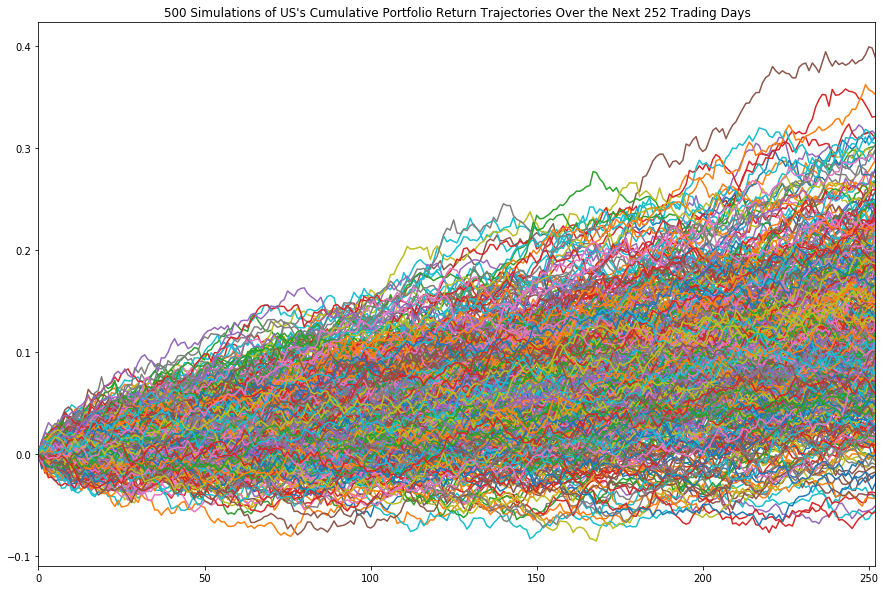

In [15]:
# Visualize the Simulation
plot_title = f"{number_simulations} Simulations of US's Cumulative Portfolio Return Trajectories Over the Next {number_records} Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize=(15,10))